[1 1 1 1 0 0 0 0]


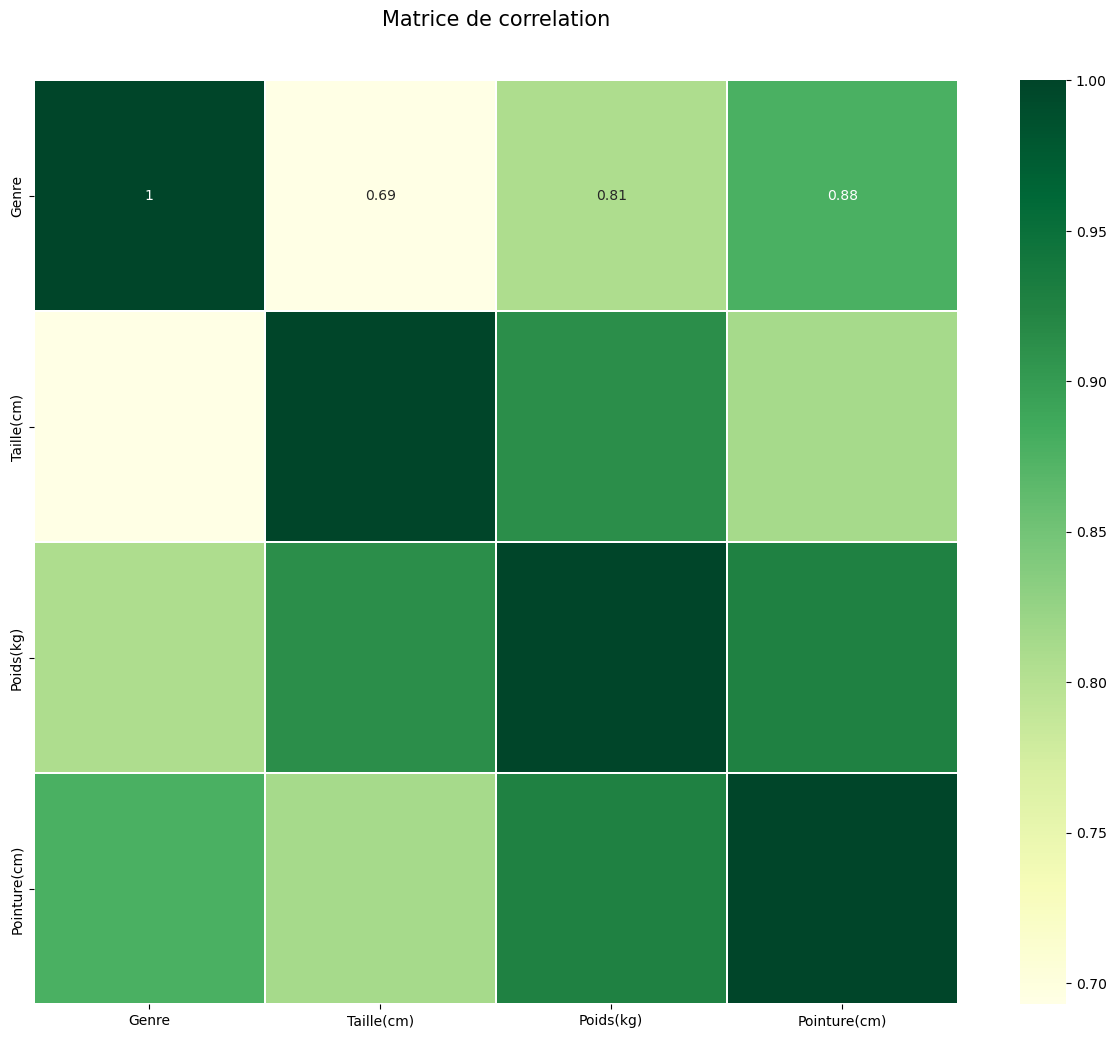

(6, 3) (2, 3) (6,) (2,)
Number of mislabeled points out of a total 6 points : 0
Accuracy du modele Naive Bayes predit: 1.0
recall score du modele Naive Bayes predit:1.0 
F1 score du modele Naive Bayes predit:1.0 
Number of mislabeled points out of a total 2 points : 1
recall score du modele Naive Bayes predit:0.0 
F1 score du modele Naive Bayes predit:0.0 
La classe predite est :  [0]
La classe predite est :  feminin
La classe predite est :  [0]
La classe predite est :  feminin


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


df = pd.read_csv('pointure.data')
df

df.columns
df.shape
df.head()
df.describe()


label_encoder = preprocessing.LabelEncoder()
input_classes = ['masculin','féminin']
label_encoder.fit(input_classes)

# transformer un ensemble de classes
encoded_labels = label_encoder.transform(df['Genre'])
print(encoded_labels)
df['Genre'] = encoded_labels

df


corr = df.corr().round(3)
f, ax = plt.subplots(figsize=(16, 12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap="YlGn", square=True, ax = ax, annot=True, linewidth = 0.1)
plt.title('Matrice de correlation', y=1.05, size=15)
plt.show()



X = df.iloc[:, lambda df: [1, 2, 3]]
y = df.iloc[:, 0]


#decomposer les donnees predicteurs en training/testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)


from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_naive_bayes1 = gnb.predict(X_train)
print("Number of mislabeled points out of a total {} points : {}".format(X_train.shape[0],(y_train != y_naive_bayes1).sum()))

from sklearn import metrics
accuracy = metrics.accuracy_score(y_train, y_naive_bayes1)
print("Accuracy du modele Naive Bayes predit: " + str(accuracy))


recall_score = metrics.recall_score(y_train, y_naive_bayes1)
print("recall score du modele Naive Bayes predit:{} ".format(recall_score))

f1_score = metrics.f1_score(y_train, y_naive_bayes1)
print("F1 score du modele Naive Bayes predit:{} ".format(f1_score))



y_naive_bayes2 = gnb.predict(X_test)

print("Number of mislabeled points out of a total {} points : {}".format(X_test.shape[0],(y_test != y_naive_bayes2).sum()))

recall_score = metrics.recall_score(y_test, y_naive_bayes2)
print("recall score du modele Naive Bayes predit:{} " .format(recall_score))

f1_score = metrics.f1_score(y_test, y_naive_bayes2)
print("F1 score du modele Naive Bayes predit:{} " .format(f1_score))


donnee = {'Taille(cm)':[183], 'Poids(kg)':[59], 'Pointure(cm)':[20]}
dfToPredict = pd.DataFrame(data=donnee) 
dfToPredict

yPredict = gnb.predict(dfToPredict)
print('La classe predite est : ', yPredict)
print('La classe predite est : ', 'masculin' if yPredict else 'feminin')


donnee = {'Taille(cm)':[199], 'Poids(kg)':[89], 'Pointure(cm)':[70]}
dfToPredict = pd.DataFrame(data=donnee) 
dfToPredict


yPredict = gnb.predict(dfToPredict)
print('La classe predite est : ', yPredict)
print('La classe predite est : ', 'masculin' if yPredict else 'feminin')


# Write scores to a file
with open("metrics.txt", 'w') as outfile:
        outfile.write("accuracy:  {0:2.1f} \n".format(accuracy))
        outfile.write("recall_score: {0:2.1f}\n".format(recall_score))
        outfile.write("f1_score: {0:2.1f}\n".format(f1_score))

